In [12]:
# Remove null value columns
df.isnull().sum()

stop_date                 0
stop_time                 0
country_name          65535
driver_gender          4061
driver_age_raw         4054
driver_age             4307
driver_race            4060
violation_raw          4060
violation              4060
search_conducted          0
search_type           63056
stop_outcome           4060
is_arrested            4060
stop_duration          4060
drugs_related_stop        0
dtype: int64

#EDA 
# 1. Who does more speeding men or women

In [95]:
df.sample(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
42541,5/23/2010,16,M,1985.0,25.0,White,Speeding,Speeding,True,Incident to Arrest,Arrest Driver,True,NaN,True
10153,9/17/2006,11,M,1988.0,18.0,White,Speeding,Speeding,False,NaN,Citation,False,NaN,False


In [96]:
df[df.violation == 'Speeding'].driver_gender.value_counts()

driver_gender
M    25517
F    11686
Name: count, dtype: int64

# 2. Who seached more often during a stop`

In [97]:
df.groupby('driver_gender').search_conducted.sum()

driver_gender
F     366
M    2113
Name: search_conducted, dtype: int64

In [98]:
df.search_conducted.value_counts()

search_conducted
False    63056
True      2479
Name: count, dtype: int64

# 3. What is mean stop duration

In [99]:
df.head(20)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,NaN,False
1,1/18/2005,8,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,NaN,False
2,1/23/2005,23,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,NaN,False
3,2/20/2005,17,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,NaN,False
4,3/14/2005,10,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,NaN,False
5,3/23/2005,9,M,1982.0,23.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,NaN,False
6,4/1/2005,17,M,1969.0,36.0,White,Speeding,Speeding,False,NaN,Citation,False,NaN,False
7,6/6/2005,13,F,1986.0,19.0,White,Speeding,Speeding,False,NaN,Citation,False,NaN,False
8,7/13/2005,10,M,1970.0,35.0,Black,Speeding,Speeding,False,NaN,Citation,False,NaN,False
9,7/13/2005,15,M,1970.0,35.0,White,Speeding,Speeding,False,NaN,Citation,False,NaN,False


In [100]:
# Filter the DataFrame based on mapped stop duration values in one line
# Correctly mapping stop_duration to numerical values
# df['stop_duration'] = df['stop_duration'].map({'0-15 Min': 7.5, '16-30 Min': 24, '30+ Min': 45})
df['stop_duration'].mean()

nan

In [101]:
df.groupby('violation').driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,6507.0,31.682957,11.380671,16.0,23.0,28.0,39.0,81.0
Moving violation,11876.0,36.736443,13.258350,15.0,25.0,35.0,47.0,86.0
Other,3477.0,40.362381,12.754423,16.0,30.0,41.0,50.0,86.0
Registration/plates,2240.0,32.656696,11.150780,16.0,24.0,30.0,40.0,74.0
Seat belt,3.0,30.333333,10.214369,23.0,24.5,26.0,34.0,42.0
Speeding,37120.0,33.262581,12.615781,15.0,23.0,30.0,42.0,88.0


   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   -------------------- ------------------- 3.9/7.5 MB 21.3 MB/s eta 0:00:01
   ---------------------------------------- 7.5/7.5 MB 20.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 13.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 14.7 MB/s eta 0:00:00


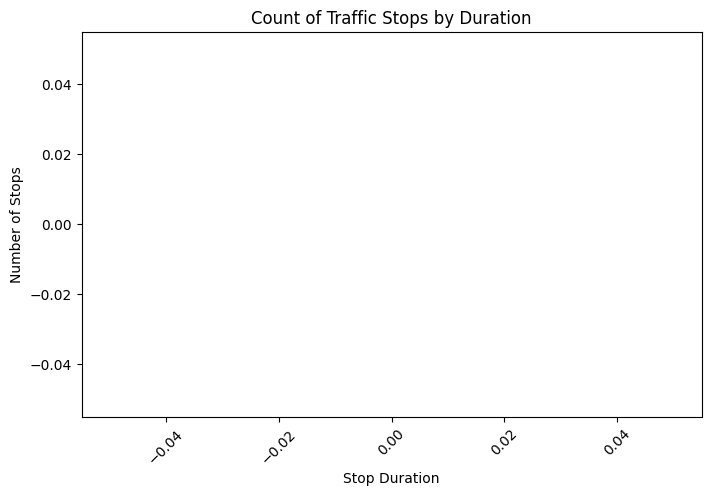